In [42]:
#Importation des bibliotheques : 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sb
import random 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2

In [3]:
#Lire la dataset avec pandas en sautant les lignes causant des probleme : 
dataset = pd.read_csv("Loan Approval -without preprocessing - Copy.txt", on_bad_lines="skip")
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Risk,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,No,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,No,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Yes,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,No,Semiurban,N


In [4]:
#Afficher la taille du dataset 
print(dataset.shape)

(611, 14)


In [5]:
#Afficher le type des colonnes
print(dataset.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Risk                  object
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
#Supprimer les lignes nuls 
#dataset.dropna(axis=0,how='any',subset=None,inplace=True)

In [7]:
#Verifier les valeurs manquants : 
#print("nombre total des valeurs manquantes : " ,dataset.isnull().sum().sum())

In [8]:
#On verifie les valeur que prennent les colonnes de type object
#colonne = dataset.columns(dtype='object')
colonneobj = dataset.select_dtypes(include=['object']).columns
for col in colonneobj :
    print(dataset[col].value_counts())

Loan_ID
LP001002    1
LP002319    1
LP002301    1
LP002305    1
LP002308    1
           ..
LP001691    1
LP001692    1
LP001693    1
LP001698    1
LP002990    1
Name: count, Length: 611, dtype: int64
Gender
Male      485
Female    112
Name: count, dtype: int64
Married
Yes    397
No     211
Name: count, dtype: int64
Dependents
0     343
1     102
2     100
3+     51
Name: count, dtype: int64
Education
Graduate        477
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     498
Yes     81
Name: count, dtype: int64
Risk
No           497
Yes           91
Semiurban      3
Rural          2
Urban          2
Nio            1
Name: count, dtype: int64
Property_Area
Semiurban    230
Urban        199
Rural        175
Y              7
Name: count, dtype: int64
Loan_Status
Y    415
N    189
Name: count, dtype: int64


In [9]:
#Supprimer les lines avec des outliers
dataset = dataset.drop(dataset[dataset['Risk'].isin(['Nio','Semiurban','Rural','Urban'])].index)

In [24]:
#On verifie les modification
colonneobj = dataset.select_dtypes(include=['object']).columns
for col in colonneobj :
    print(dataset[col].value_counts())
#for col in colonneobj:
#    print(f"{col}: {dataset[col].unique()}")

Loan_ID
LP001002    1
LP002305    1
LP002314    1
LP002315    1
LP002317    1
           ..
LP001702    1
LP001708    1
LP001711    1
LP001713    1
LP002990    1
Name: count, Length: 603, dtype: int64
Gender
Male      492
Female    111
Name: count, dtype: int64
Married
Yes    394
No     209
Name: count, dtype: int64
Dependents
0     354
1     100
2      99
3+     50
Name: count, dtype: int64
Education
Graduate        473
Not Graduate    130
Name: count, dtype: int64
Self_Employed
No     523
Yes     80
Name: count, dtype: int64
Risk
No     512
Yes     91
Name: count, dtype: int64
Property_Area
Semiurban    229
Urban        199
Rural        175
Name: count, dtype: int64
Loan_Status
Y    414
N    189
Name: count, dtype: int64


In [11]:
#Afficher les valeurs manquants :
print("nombre des valeurs manquantes par ligne: \n" ,dataset.isnull(),"\n") 
print("nombre des valeurs manquantes par colonne: \n " ,dataset.isnull().sum(),"\n")
print("nombre total des valeurs manquantes : " ,dataset.isnull().sum().sum())

nombre des valeurs manquantes par ligne: 
      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
606    False   False    False       False      False          False   
607    False   False    False       False      False          False   
608    False   False    False       False      False          False   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False           

In [12]:
#On traite les valeurs nul de type Numerique avec la median et le Simpleimputer:
imputermed = SimpleImputer(missing_values = np.nan, strategy='median')
#Extraire les colonnes de type numerique
colonnenum= dataset.select_dtypes(include=['int','float']).columns
for col in colonnenum :
    dataset[[col]] = imputermed.fit_transform(dataset[[col]])

In [13]:
#On traite les valeurs nul de type object avec la valeur la plus répétée et le Simpleimputer:
imputermf = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
#Pour les colonnes de type object
colonneobj= dataset.select_dtypes(include=['object']).columns
for col in colonneobj :
    dataset[[col]] = imputermf.fit_transform(dataset[[col]])

In [14]:
#Verifier les valeurs manquants : 
print("nombre total des valeurs manquantes :\n",dataset.isnull().sum().sum())

nombre total des valeurs manquantes :
 0


<Axes: >

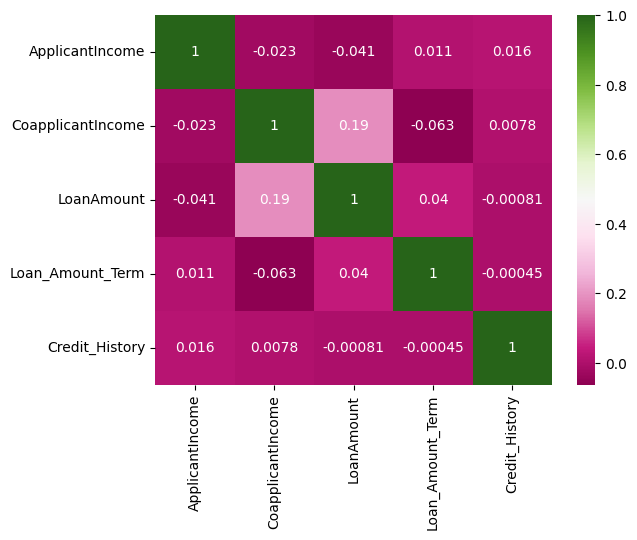

In [19]:
#la matrice de corelation pour les valeurs numerique: 
colonnenum= dataset.select_dtypes(include=['number']).columns
matricecorr = dataset[colonnenum].corr()
sb.heatmap(matricecorr, annot = True, cmap = 'PiYG', linecolor='white')

In [68]:
#Test de ki2 pour les valeurs Categorique: 
#D'abord on transforme les variables categorique avec le one hot-encoding
columnsobj= dataset.select_dtypes(include=['object']).columns
encoded_dataset = dataset.copy()
le = LabelEncoder()
for col in columnsobj :
    encoded_dataset[col] = le.fit_transform(dataset[col])
#La matrice de correlation apres le one-hot encoding
#matricecorrcat = encoded_dataset[columnsobj].corr()
#sb.heatmap(matricecorrcat, annot = True, cmap = 'PiYG', linecolor='white')
target = columnsobj[1]
for coly in columnsobj :
    for colx in columnsobj :
        if (colx != coly) :   
            chi2_stats, p_values = chi2(encoded_dataset[[colx]],encoded_dataset[coly])
            print(f"chi2 score of {coly}and{colx} :\n chi2_stats: {chi2_stats[0]:.4}, p_values: {p_values[0]:.4} ")

chi2 score of Loan_IDandGender :
 chi2_stats: 111.0, p_values: 1.0 
chi2 score of Loan_IDandMarried :
 chi2_stats: 209.0, p_values: 1.0 
chi2 score of Loan_IDandDependents :
 chi2_stats: 825.3, p_values: 3.4e-09 
chi2 score of Loan_IDandEducation :
 chi2_stats: 473.0, p_values: 1.0 
chi2 score of Loan_IDandSelf_Employed :
 chi2_stats: 523.0, p_values: 0.991 
chi2 score of Loan_IDandRisk :
 chi2_stats: 512.0, p_values: 0.9967 
chi2 score of Loan_IDandProperty_Area :
 chi2_stats: 358.8, p_values: 1.0 
chi2 score of Loan_IDandLoan_Status :
 chi2_stats: 189.0, p_values: 1.0 
chi2 score of GenderandLoan_ID :
 chi2_stats: 40.06, p_values: 2.465e-10 
chi2 score of GenderandMarried :
 chi2_stats: 27.76, p_values: 1.377e-07 
chi2 score of GenderandDependents :
 chi2_stats: 24.34, p_values: 8.083e-07 
chi2 score of GenderandEducation :
 chi2_stats: 1.245, p_values: 0.2645 
chi2 score of GenderandSelf_Employed :
 chi2_stats: 0.006231, p_values: 0.9371 
chi2 score of GenderandRisk :
 chi2_stats: 0